# Predicting JFK Airport Weather using Machine Learning

In this project, we'll predict the weather in JFK Airport (NYC) using a machine learning (ML) algorithm. This is a simple ML-based project on "real-world" data, which starts by downloading JFK's weather records from 1960 to 2022 (including) and ends by making predictions on the maximum temperature of each following day.

The data was downloaded from the National Oceanic and Atmospheric Administration (https://www.noaa.gov) as a CSV file, containing 45 different columns. The below cells show the process and the logic used to isolate the most relevant predictors and make it machine-learning-ready.



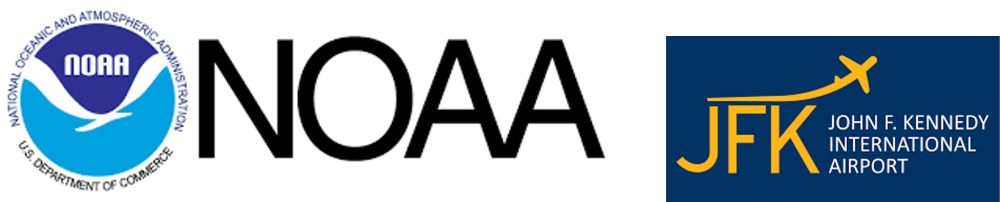







## Read JFKweather_1960_2023.csv dataset and decide on most relevant data columns to keep


**Summary:**

Inspecting the data documentation (https://www.ncei.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf), on page 5 we can see that there are 5 core values in these datasets:
- PRCP — total precipitation
- TMAX — maximum daily temperature
- TMIN — minimum daily temperature
- SNOW — the total daily snowfall
- SNWD — total snow depth on the ground

While assuming that these columns contain the most significant and the best quality data (these are also with the lowest percent of null values) we will continue with only these 5 columns for training our ML algorithm.

In [2]:
#Import libraries relevant to the project:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
weather = pd.read_csv("JFKweather_1960_2023.csv", index_col='DATE') #loading the csv into a df object while specifying the DATE column as the index.

In [4]:
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,NaN,0.08,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,NaN,0.68,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### WE have a dataset with 45 columns, however in order to simplify this dataset and also make it machine learning ready, lets drop less relevant columns and columns with high percentage of Null values.

In [5]:
#Lets calculate percentage of null values per columne:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.502825
ACSH       0.502781
AWND       0.381019
FMTM       0.560056
PGTM       0.466930
PRCP       0.000087
SNOW       0.000174
SNWD       0.000130
TAVG       0.729011
TMAX       0.000043
TMIN       0.000043
TSUN       0.998653
WDF1       0.503042
WDF2       0.576656
WDF5       0.580262
WDFG       0.777464
WDFM       0.999957
WESD       0.736181
WSF1       0.502912
WSF2       0.576656
WSF5       0.580306
WSFG       0.675691
WSFM       0.999913
WT01       0.658178
WT02       0.939293
WT03       0.939249
WT04       0.983835
WT05       0.983835
WT06       0.991352
WT07       0.995307
WT08       0.778463
WT09       0.992439
WT11       0.999392
WT13       0.905050
WT14       0.961455
WT15       0.998175
WT16       0.675778
WT17       0.997393
WT18       0.940596
WT19       0.999957
WT21       0.999783
WT22       0.997871
WV01       0.999957
dtype: float64

**Going through the proportion of null values per column we notice that many of the columns have high percent of null values and in some the vast majority of values are null**

In [6]:
#Creating a new dataframe with only the core value columns:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()

In [7]:
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

In [8]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.00,0.0,0.0,41.0,26.0
1960-01-02,0.08,0.0,0.0,45.0,24.0
1960-01-03,0.68,0.0,0.0,51.0,38.0
1960-01-04,0.00,0.0,0.0,40.0,34.0
1960-01-05,0.00,0.0,0.0,38.0,31.0
...,...,...,...,...,...
2022-12-28,0.00,0.0,0.0,45.0,27.0
2022-12-29,0.00,0.0,0.0,46.0,32.0
2022-12-30,0.00,0.0,0.0,51.0,34.0


## Checking column values in the core_weather dataset to see if they are beneficial to the predictive algorithm


We see that over 96% and over 94% of the values in snow and snow_depth respectively are 0.0 (no snow), considering the aspects of data balance and data variability this might affect the ML algorithm's ability to learn and generalize.
So these 2 columns can be deleted.

**If snow is not something that is present on most days, it's not a factor that can help a predictive model.**

In [9]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip        0.000087
snow          0.000174
snow_depth    0.000130
temp_max      0.000043
temp_min      0.000043
dtype: float64

In [10]:
core_weather["snow"].value_counts(normalize=True)

0.0     0.962274
0.1     0.004564
0.2     0.003303
0.3     0.003303
0.4     0.002043
          ...   
10.4    0.000043
8.1     0.000043
5.7     0.000043
4.1     0.000043
11.9    0.000043
Name: snow, Length: 97, dtype: float64

In [11]:
core_weather["snow_depth"].value_counts(normalize=True)

0.0     0.948325
1.0     0.012169
2.0     0.010213
3.0     0.005737
4.0     0.003303
6.0     0.002651
5.0     0.002347
1.2     0.002173
7.0     0.001478
8.0     0.001478
9.0     0.000956
5.1     0.000913
3.1     0.000739
7.1     0.000739
12.0    0.000739
10.0    0.000695
11.0    0.000695
14.0    0.000652
3.9     0.000565
5.9     0.000565
7.9     0.000522
9.1     0.000478
9.8     0.000348
13.0    0.000261
17.0    0.000174
22.0    0.000174
18.0    0.000130
16.0    0.000130
19.0    0.000130
15.0    0.000130
26.0    0.000087
28.0    0.000087
21.0    0.000087
23.0    0.000043
20.0    0.000043
11.8    0.000043
Name: snow_depth, dtype: float64

In [12]:
#Deleting snow and snow_depth columns:
del core_weather['snow']
del core_weather['snow_depth']

## Dealing with null values

In [13]:
#Check rows in percip column that have null values:
core_weather[pd.isnull(core_weather['precip'])]

,precip,temp_max,temp_min
DATE,,,
1960-05-29,NaN,66.0,52.0
1962-02-09,NaN,41.0,24.0


In [14]:
core_weather.loc["1960-05-20":"1960-06-05"] #checking what was the precipitation on days around the 1960 null value

,precip,temp_max,temp_min
DATE,,,
1960-05-20,0.00,73.0,60.0
1960-05-21,0.05,77.0,56.0
1960-05-22,0.32,57.0,52.0
1960-05-23,0.50,60.0,53.0
1960-05-24,0.31,71.0,56.0
1960-05-25,0.00,72.0,56.0
1960-05-26,0.00,75.0,55.0
1960-05-27,0.00,78.0,57.0
1960-05-28,0.00,68.0,54.0


In [15]:
core_weather["precip"].value_counts() #see if the majority of days had no precipitation

0.00    15474
0.01      664
0.02      510
0.03      363
0.04      301
        ...  
2.45        1
6.27        1
2.15        1
3.39        1
3.24        1
Name: precip, Length: 279, dtype: int64

**Considering that we only have 2 null values in the precip column, and the majority of days had no or few precipitation we can set these nulls as 0.0.**

In [16]:
core_weather['precip'] = core_weather['precip'].fillna(0)

In [17]:
#Check nulls in temp_max and temp_min columns:
core_weather[pd.isnull(core_weather['temp_max'])]

,precip,temp_max,temp_min
DATE,,,
1960-05-01,0.0,NaN,NaN


In [18]:
core_weather[pd.isnull(core_weather['temp_min'])]

,precip,temp_max,temp_min
DATE,,,
1960-05-01,0.0,NaN,NaN


We have only on day in which temp_max and temp_min were not recorded, let's use the fwd fill method to fill these with the record of the day before.

In [19]:
core_weather = core_weather.fillna(method="ffill")

In [20]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0] #Checking if we have remaining null values.

precip      0.0
temp_max    0.0
temp_min    0.0
dtype: float64

## Cheking that all data types are numeric and the index (dates) is datetime object, if it's not convert it to datetime

In [21]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [22]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-12-23', '2022-12-24', '2022-12-25', '2022-12-26', '2022-12-27',
       '2022-12-28', '2022-12-29', '2022-12-30', '2022-12-31', '2023-01-01'],
      dtype='object', name='DATE', length=23012)

In [23]:
#Convert the index from string object to datetime object:

core_weather.index = pd.to_datetime(core_weather.index)

In [24]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-12-23', '2022-12-24', '2022-12-25', '2022-12-26',
               '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30',
               '2022-12-31', '2023-01-01'],
              dtype='datetime64[ns]', name='DATE', length=23012, freq=None)

**Now that the index is a datetime object we can easily perform subseting by days, months or years.**

**In the documentation file it's stated that "Note:  9’s in a field (e.g.9999) indicate missing data or data that has not been received. " , so let's check if we've got any 9999 in the data:**

In [25]:
core_weather.apply(lambda x: (x==9999)).sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

## Analysis and visualization of the data

- Visualize Temp_max and Temp_min over time
  
- Precipitation over time


In our exploration, we see that from 1960 to 2022 (63 years) data is complete and there are no missing days.

<Axes: xlabel='DATE'>

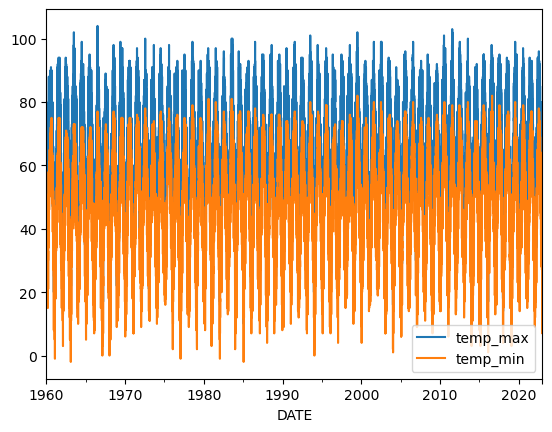

In [26]:
core_weather[["temp_max", "temp_min"]].plot()

In [27]:
core_weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
       ... 
2019    365
2020    366
2021    365
2022    365
2023      1
Name: DATE, Length: 64, dtype: int64

**Bellow is the precipitation pattern throughout these years:**

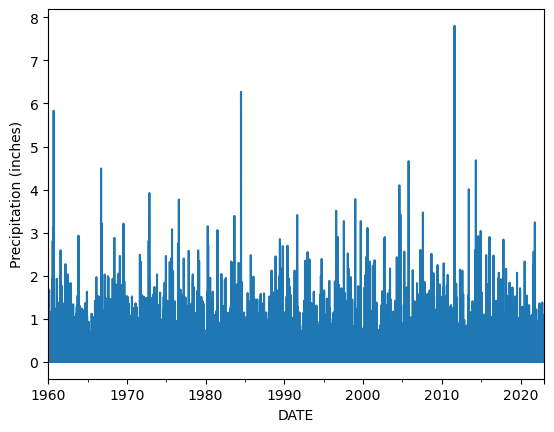

In [28]:
core_weather['precip'].plot()
plt.ylabel('Precipitation (inches)')
plt.show()

## Building the ML model and training it with the dataset


**We will use a linear regression model from sickit learn module, and more specifically we'll choose a 'Ridge' regression that minimizes overfitting.**

In [29]:
#Adding a "target" column with each row conataining the temp_max value of the following day:
core_weather['target'] = core_weather.shift(-1)['temp_max']

In [30]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,41.0,26.0,45.0
1960-01-02,0.08,45.0,24.0,51.0
1960-01-03,0.68,51.0,38.0,40.0
1960-01-04,0.00,40.0,34.0,38.0
1960-01-05,0.00,38.0,31.0,38.0
...,...,...,...,...
2022-12-28,0.00,45.0,27.0,46.0
2022-12-29,0.00,46.0,32.0,51.0
2022-12-30,0.00,51.0,34.0,51.0


In [31]:
#Ommiting the last record (2023-01-01) because we don't need it anymore:
core_weather = core_weather.loc["1960-01-01":"2022-12-31"]

In [32]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [33]:
predictors = ['precip', 'temp_max', 'temp_min']

In [34]:
#Split the data into training and test datasets:
train = core_weather.loc[:"2020-12-31"]

In [35]:
test = core_weather.loc["2021-01-01":]

In [36]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [37]:
predictions = reg.predict(test[predictors])

In [38]:
from sklearn.metrics import mean_absolute_error

In [39]:
mean_absolute_error(test['target'], predictions)

5.246469483856049

In [40]:
combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [41]:
combined

,actual,predictions
DATE,,
2021-01-01,53.0,42.167550
2021-01-02,39.0,52.032879
2021-01-03,45.0,43.865516
2021-01-04,43.0,47.838787
2021-01-05,43.0,47.405137
...,...,...
2022-12-27,45.0,39.650701
2022-12-28,46.0,43.874337
2022-12-29,51.0,46.832517


<Axes: xlabel='DATE'>

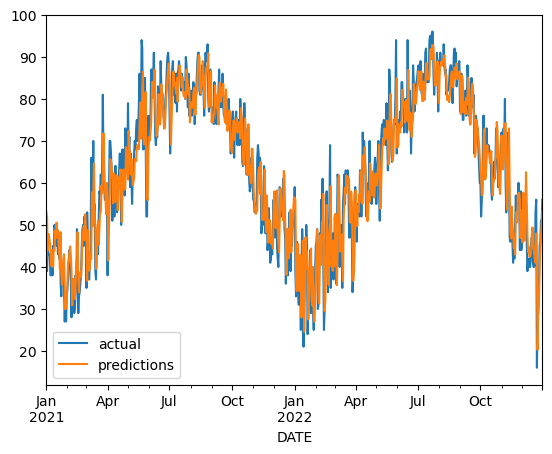

In [42]:
combined.plot()

In [43]:
reg.coef_

array([-1.33018503,  0.47208547,  0.49721899])

In [44]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target"], predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

## Adding predictors to improve the accuracy of the model

These predictors will be rolling averages of the temperature during a certain time period. For example, if the temperature on average in the last week has been 70F but is 80F today, today might be unseasonably warm, and the temperature might be lower tomorrow.

In [45]:
#Add a column of monthly rolling average of temp_max, each row will have the mean temp_max of the previous 30 days:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()
core_weather["month_day_max"] = core_weather["month_max"] - core_weather["temp_max"]
core_weather["max_min"] = core_weather["temp_max"] - core_weather["temp_min"]

C:\Users\guyal\AppData\Local\Temp\ipykernel_17728\982384716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()
C:\Users\guyal\AppData\Local\Temp\ipykernel_17728\982384716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_weather["month_day_max"] = core_weather["month_max"] - core_weather["temp_max"]
C:\Users\guyal\AppData\Local\Temp\ipykernel_17728\982384716.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of

**While creating the above features as "ratios" we got an error while running the model, it's because when the temp_min was 0 calculated ratios were infinity, and that caused an error. So, using the difference between temp_max and temp_min is a valid and effective way to capture the temperature variability without encountering issues related to division by zero.**

In [46]:
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min
DATE,,,,,,,
1960-01-01,0.00,41.0,26.0,45.0,NaN,NaN,15.0
1960-01-02,0.08,45.0,24.0,51.0,NaN,NaN,21.0
1960-01-03,0.68,51.0,38.0,40.0,NaN,NaN,13.0
1960-01-04,0.00,40.0,34.0,38.0,NaN,NaN,6.0
1960-01-05,0.00,38.0,31.0,38.0,NaN,NaN,7.0
...,...,...,...,...,...,...,...
2022-12-27,0.00,35.0,28.0,45.0,44.400000,9.400000,7.0
2022-12-28,0.00,45.0,27.0,46.0,44.033333,-0.966667,18.0
2022-12-29,0.00,46.0,32.0,51.0,44.100000,-1.900000,14.0


In [47]:
#The first 30 rows now have null values so they should be removed:
core_weather = core_weather.iloc[30:,:].copy()

In [48]:
predictors = ['precip', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'max_min']

In [49]:
core_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22981 entries, 1960-01-31 to 2022-12-31
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precip         22981 non-null  float64
 1   temp_max       22981 non-null  float64
 2   temp_min       22981 non-null  float64
 3   target         22981 non-null  float64
 4   month_max      22981 non-null  float64
 5   month_day_max  22981 non-null  float64
 6   max_min        22981 non-null  float64
dtypes: float64(7)
memory usage: 1.4 MB


In [50]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)
error, combined = create_predictions(predictors, core_weather, reg)

In [51]:
error

5.092179401286141

**By adding additional features to the model we improved the mean absolute error from 5.24 to 5.09**

<Axes: xlabel='DATE'>

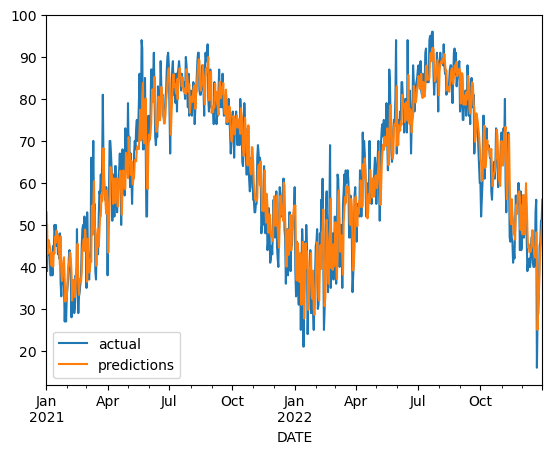

In [52]:
combined.plot()

### To try and improve our model, let's add additional more feature:
- Add a column of the monthly mean for temp_max.
- Add a column of 'day of the year average', which means for example if its day 10 of the year the value should be the mean of day 10 in past years.

*One crucial point to consider is that future knowledge should not affect past rows and our cast predictions. So for example, the monthly mean for each row (day) should not be affected by future data (days) of that month, so in each given month each subsequent row in this column will contain an updated monthly mean. By using grouping by month and then an expanding mean method we prevent future knowledge to affect our cast predictions.

In [53]:
#Add a column of expanding monthly average for temp_max:
core_weather["monthly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month, group_keys=False).apply(lambda x: x.expanding(1).mean())

In [54]:
#Add a column of expanding day of the year average for temp_max:
core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.day_of_year, group_keys=False).apply(lambda x: x.expanding(1).mean())

In [55]:
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,
1960-01-31,0.00,40.0,32.0,36.0,39.233333,-0.766667,8.0,40.000000,40.000000
1960-02-01,0.00,36.0,32.0,36.0,38.933333,2.933333,4.0,36.000000,36.000000
1960-02-02,0.00,36.0,23.0,38.0,38.433333,2.433333,13.0,36.000000,36.000000
1960-02-03,0.00,38.0,19.0,50.0,38.366667,0.366667,19.0,36.666667,38.000000
1960-02-04,0.00,50.0,30.0,50.0,38.766667,-11.233333,20.0,40.000000,50.000000
...,...,...,...,...,...,...,...,...,...
2022-12-27,0.00,35.0,28.0,45.0,44.400000,9.400000,7.0,43.807594,39.682540
2022-12-28,0.00,45.0,27.0,46.0,44.033333,-0.966667,18.0,43.808205,41.746032
2022-12-29,0.00,46.0,32.0,51.0,44.100000,-1.900000,14.0,43.809329,41.904762


In [56]:
predictors = ['precip', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'max_min', 'monthly_avg', 'day_of_year_avg']

In [57]:
error, combined = create_predictions(predictors, core_weather, reg)

In [58]:
error

4.877739795427092

**By adding 'monthly_avg' and 'day_of_year_avg' additional features to the model we have got an even better mean absolute error of 4.88, compared to previous 5.09**

<Axes: xlabel='DATE'>

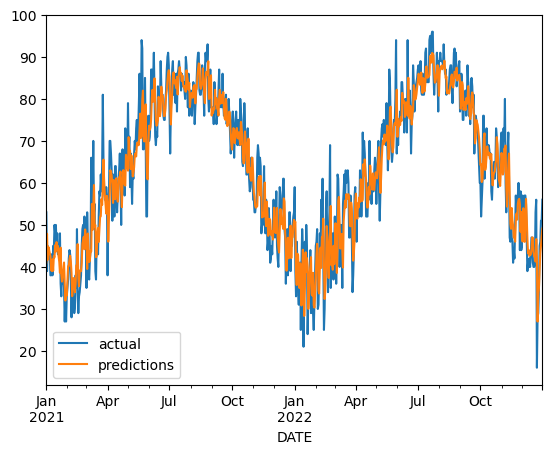

In [59]:
combined.plot()

### Running model diagnostics:

In [269]:
reg.coef_

array([-1.05495519,  0.25420768,  0.27483082,  0.12732871, -0.12687896,
       -0.02062315,  0.11541775,  0.23319585])

In [272]:
core_weather.corr()["target"]

precip            -0.005082
temp_max           0.916863
temp_min           0.915249
target             1.000000
month_max          0.872895
month_day_max     -0.263503
max_min            0.197621
monthly_avg        0.891240
day_of_year_avg    0.903243
Name: target, dtype: float64

**Checking the correlations of each predictor to our target column can help identify which are contributing most to the model and which are less affecting the accuracy.**

### Additional exploration and improvement of the model could be, checking where the biggest difference between our actual data and the predicted is, what affects this difference, and trying to further improve our model through these findings.

In [274]:
#Create a column of difference in the combined dataset:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [276]:
combined.sort_values("diff", ascending=False).head()

,actual,predictions,diff
DATE,,,
2022-12-23,16.0,42.043765,26.043765
2021-05-21,94.0,71.199563,22.800437
2021-03-08,66.0,43.688415,22.311585
2021-03-25,81.0,59.281310,21.718690
2022-02-22,69.0,48.087794,20.912206
